# BTTH03: Linear Regression

Trần Tuấn Tú
MSSV: 1312681

---



## 1. Cách làm bài và nộp bài

**Làm bài**

Bạn sẽ làm trực tiếp trên file notebook này; trong file, mình đã để từ `TODO` để cho biết những chỗ mà bạn cần phải làm (trong đó, `TODO` đầu tiên là bạn phải ghi họ tên và MSSV vào phần đầu của file). Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

*Lưu ý: tuyệt đối không gian lận. Nếu vi phạm thì bạn sẽ bị 0 điểm cho cả phần thực hành môn học. Nên nhớ mục tiêu chính ở đây là học kiến thức.*

**Nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Cell` - `Run All` để chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Cell` - `Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, trong thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) bạn đặt file `Ex03-LinearRegression.ipynb`; rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

## 2. Import

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# You can also import other things ...

## 3. Hàm phát sinh dữ liệu

Trong bài tập này, bạn sẽ thử nghiệm Linear Regression trên bộ dữ liệu tự tạo với không gian đầu vào $\mathcal{X}$ là không gian một chiều (để có thể trực quan hóa được). Cách tạo bộ dữ liệu như sau:

- Hàm đích (target function) của mình là: $f(x) = x$.
- Mỗi input $x$ được phát sinh bằng cách lấy ngẫu nhiên một giá trị trong $[-1, 1]$ theo phân bố đều. Output $y$ tương ứng sẽ được phát sinh như sau: $y = f(x) + noise$ với $noise$ được phát sinh từ phân bố Gauss với mean bằng 0 và variance bằng $0.5^2$.

In [51]:
def generate_data(N):
    """
    Generates data.
    
    Parameters:
    -----------
    N : int
        The number of data points.
    
    Returns:
    --------
    (X, Y) : tuple
        X : numpy array, shape (N, 2)
            The matrix of input vectors (each row corresponds to an input vector); the first column of 
            this matrix is all ones (corresponding to x_0).
        Y : numpy array, shape (N, 1)
            The vector of outputs.
    """
    X = np.ones((N, 2))
    for i in range(N):
         X[i, 1] = np.random.uniform(-1,1)
    Y = X[:, 1:2]
    Y = Y + np.array([np.random.normal(0,0.5,N)]).T
    return (X, Y)
    # TODO

## 4. Hàm huấn luyện Linear Regression

In [52]:
def train_linear_regression(X, Y):
    """
    Trains Linear Regression on the dataset (X, Y).
    
    Parameters:
    -----------
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    
    Returns:
    --------
    W : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    """
    #Khoi tao ban dau, mang cac tham so phi
    W = np.ones((X.shape[1], 1))
    #Random mang phi
    for i in range(X.shape[1]):
        #if (i > 0):
        W[i][0] = np.random.uniform(-2, 2)
    #Gradient Descent N lan
    #temp = X[:, 1:X.shape[1]]
    for i in range(100): #Cho hoi quy 100 lan  
        #Tinh hypothesis
        hypo = np.dot(X,W)
        for j in range(X.shape[1]):
            W[j][0] = W[j][0] - np.dot(X[:, j:j+1].T, (hypo - Y)) / X.shape[0]
    return W
    # TODO

## 5. Hàm tính độ lỗi của Linear Regression

In [53]:
def compute_err(W, X, Y):
    """
    Computes the mean squared error of W on the dataset (X, Y).
    
    Parameters:
    -----------
    W : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression.
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    
    Returns:
    --------
    mse : float
        Mean squared error between predicted outputs and correct outputs.
    """
    hypo = np.dot(X, W)
    res = np.square(hypo - Y)
    mse = (np.sum(res, axis=0))/(X.shape[0])
    return mse
    # TODO

## 6. Hàm main

Hàm `main` có hai tham số đầu vào:

- `Ns` (list): gồm các kích thước của tập huấn luyện mà mình sẽ thí nghiệm.
- `num_runs` (int): số lần chạy với mỗi kích thước của tập huấn luyện.

Trong hàm `main`, với mỗi kích thước `N` của tập huấn luyện, ta sẽ chạy `num_runs` lần, trong đó ở mỗi lần chạy:

- Phát sinh ra tập huấn luyện gồm `N` điểm dữ liệu.
- Huấn luyện Linear Regression để tìm ra bộ tham số `W`.
- Tính độ lỗi trên tập huấn luyện `E_in`.
- Phát sinh ra tập kiểm tra (test set) gồm 1000 điểm dữ liệu.
- Tính độ lỗi trên tập kiểm tra `E_out`.

Ta sẽ tính giá trị trung bình của `E_in` và `E_out` sau `num_runs` lần chạy.

Trong hàm `main`, bạn sẽ bổ sung các phần sau:

- Nếu `len(Ns) = 1` và `num_runs = 1` thì bạn sẽ vẽ ra đồ thị có trục hoành là $x$ và trục tung là $y$; trên đồ thị này, bạn sẽ vẽ ra đường thẳng $y = x$ ứng với hàm đích, các điểm dữ liệu của tập huấn luyện, và đường thẳng học được của Linear Regression.
- Nếu `len(Ns) > 1` thì bạn sẽ vẽ ra đồ thị có trục hoành là kích thước `N` của tập huấn luyện và trục tung là độ lỗi; trên đồ thị này, bạn sẽ vẽ ra hai đường ứng với `E_in` và `E_out` (các giá trị trung bình sau `num_runs` lần chạy) để cho thấy sự thay đổi của `E_in` và `E_out` khi `N` thay đổi.

In [54]:
def main(Ns, num_runs):
    """
    Parameters:
    -----------
    Ns : list
        List of training set's sizes.
    num_runs: int
        The number of runs.
    """
    avg_E_in_list = [] # The list of average E_in's (each average E_in corresponds to a training set's size)
    avg_E_out_list = [] # The list of average E_out's
    
    for N in Ns:
        avg_E_in = 0.0
        avg_E_out = 0.0
        for r in range(num_runs):
            # Generate a training set
            X, Y = generate_data(N)
            
            # Train Linear Regression
            W = train_linear_regression(X, Y)
            
            # Compute E_in and update average E_in
            E_in = compute_err(W, X, Y)
            avg_E_in += E_in / num_runs
            
            # Visualize the target line, the training data points, and the line of Linear Regression
            # TODO: if len(Ns) == 1 and num_runs == 1: ...
            if (len(Ns) == 1 and num_runs == 1):
                plt.plot([-2, 2], [-2,2], label = 'y = x')
                plt.plot(X.T[1], Y.T[0], 'ro')
                plt.plot([-2,2], np.dot([[1,-2],[1,2]],W).T[0], label = 'Linear Regression')
                plt.legend()
                plt.show()
            
            # Generate a test set
            X_test, Y_test = generate_data(1000)
            
            # Compute E_out and update average E_out
            E_out = compute_err(W, X_test, Y_test)
            avg_E_out += E_out / num_runs
            
        avg_E_in_list.append(avg_E_in)
        avg_E_out_list.append(avg_E_out)
    
    # Visualize how avg_E_in and avg_E_out vary when N varies
    # TODO: if len(Ns) > 1: ...
    if len(Ns) > 1:
        plt.plot(Ns, avg_E_in_list, label = 'E_in')
        plt.plot(Ns, avg_E_out_list, label = 'E_out', color = 'g')
        plt.legend()
        plt.show()
    

## 7. Thí nghiệm

Đầu tiên, để kiểm tra một cách trực quan đường hồi qui học được của Linear Regression, bạn hãy gọi hàm `main` ở trên với `Ns = [2]` và `num_runs = 1`.

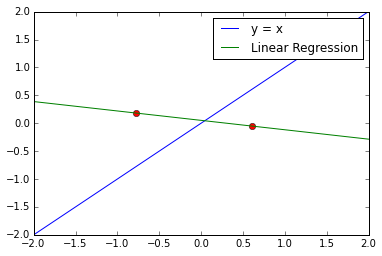

In [55]:
# TODO
Ns = [2]
num_runs = 1
main(Ns, num_runs)

Kế đến, để thấy được sự thay đổi của `E_in` và `E_out` khi `N` thay đổi, bạn hãy gọi hàm `main` ở trên với `Ns = [10, 20, 30, 40, 50]` và `num_runs = 100`. Cho nhận xét dựa trên đồ thị kết quả.

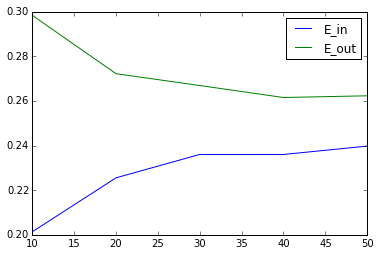

In [56]:
# TODO
Ns = [10, 20, 30, 40, 50]
num_runs = 100
main(Ns, num_runs)

Khi số lần thử càng nhiều thì độ sai lệch giữa in và out càng nhỏ và ngày càng hội tụ lại tại một điểm